In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("winequality-red")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

I see that there are total 1599 rows and 12 columns present in our dataset.

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 we do not see any missing values in any of the columns of our dataset.

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

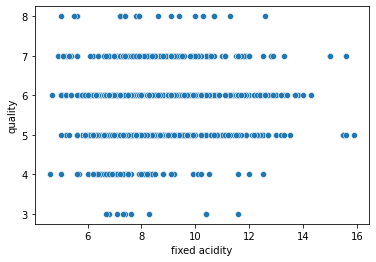

In [7]:
sns.scatterplot(x="fixed acidity",y="quality",data=df)

# Visualization

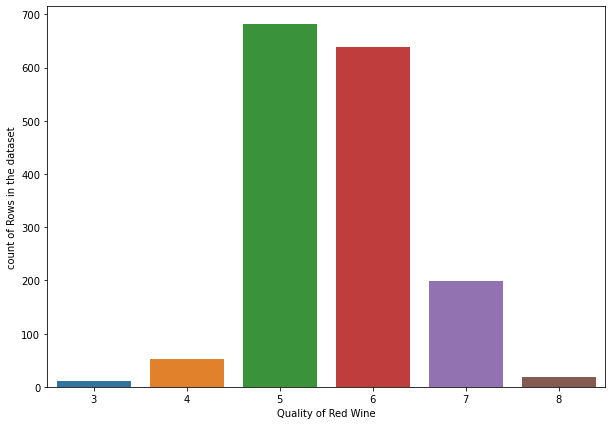

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(x='quality',data=df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('count of Rows in the dataset')
plt.show()

In the countplot representation we see the various categories of red wine quality and it shows that the number of data present for quality score 5 and 6 is way higher than it's counterparts. This indicates an imbalance which will need to be rectified so that our machine learning model do not get biased to a certain value during prediction.

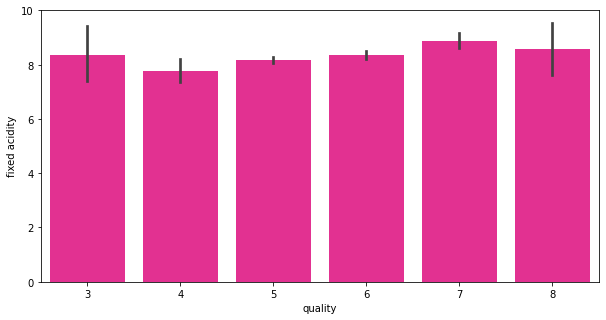

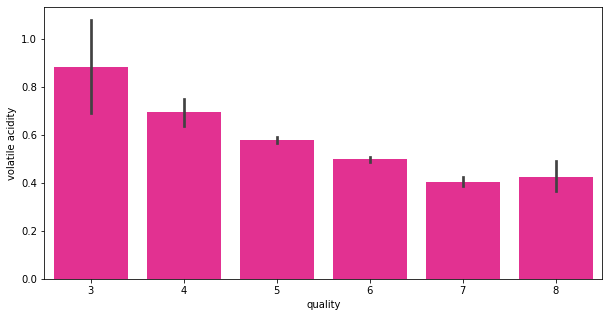

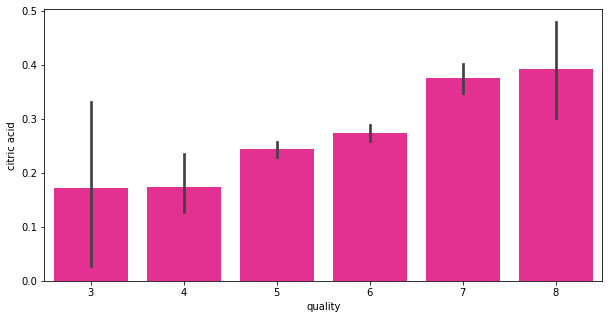

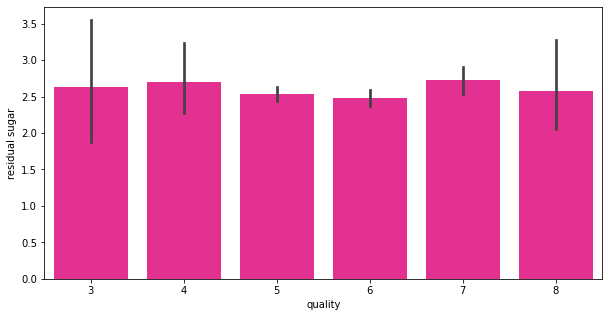

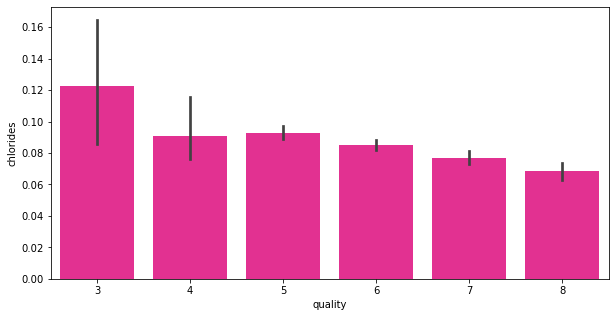

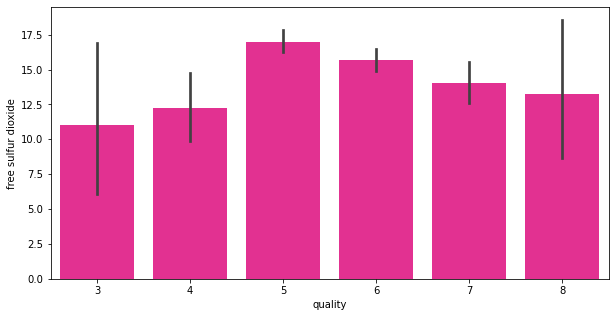

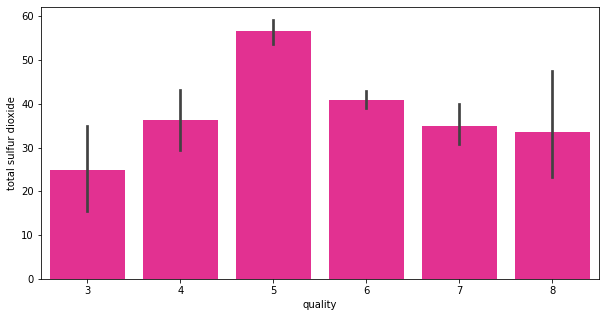

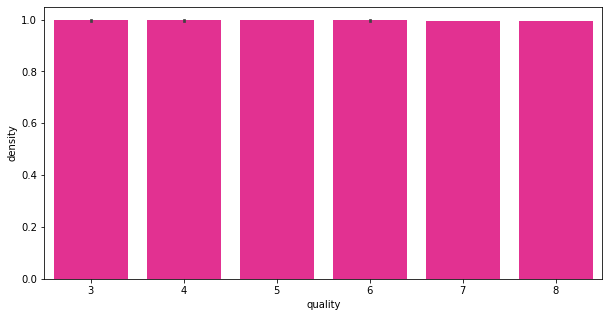

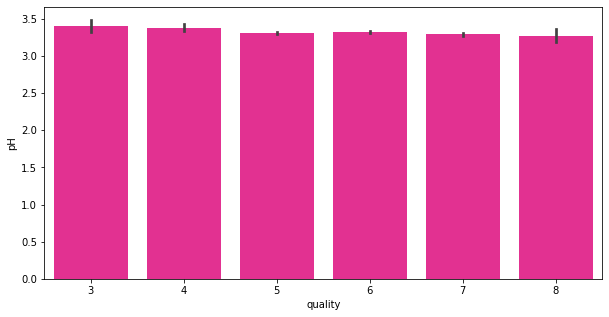

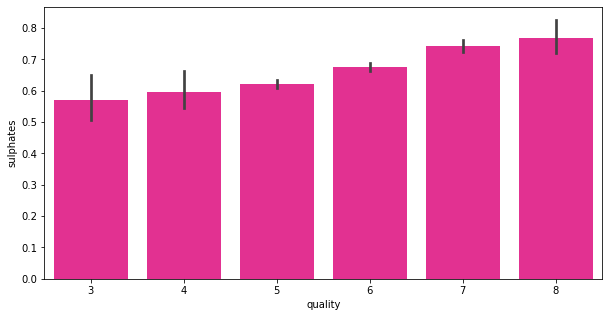

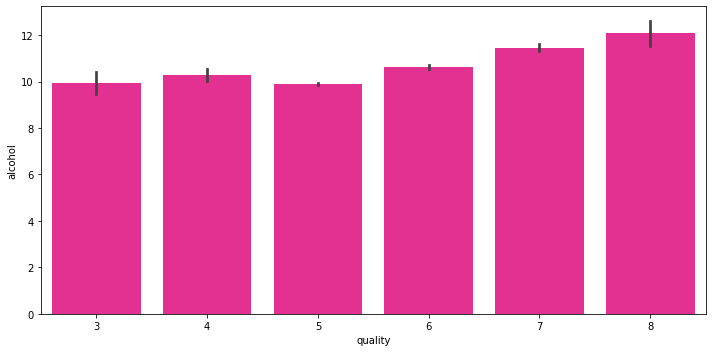

In [9]:
index=0
labels=df['quality']
features=df.drop('quality',axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels,y=col[index],data=df,color="deeppink")
plt.tight_layout()
plt.show()


Observations regarding feature compared to the label are:

    fixed acidity vs quality - no fixed pattern
    volatile acidity vs quality - there is a decreasing trend
    citric acid vs quality - there is an increasing trend
    residual sugar vs quality - no fixed pattern
    chlorides vs quality - there is a decreasing trend
    free sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing
    total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing
    density vs quality - no pattern at all
    pH vs quality - no pattern at all
    sulphates vs quality - there is an increasing trend
    alcohol vs quality - there is an increasing trend

So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

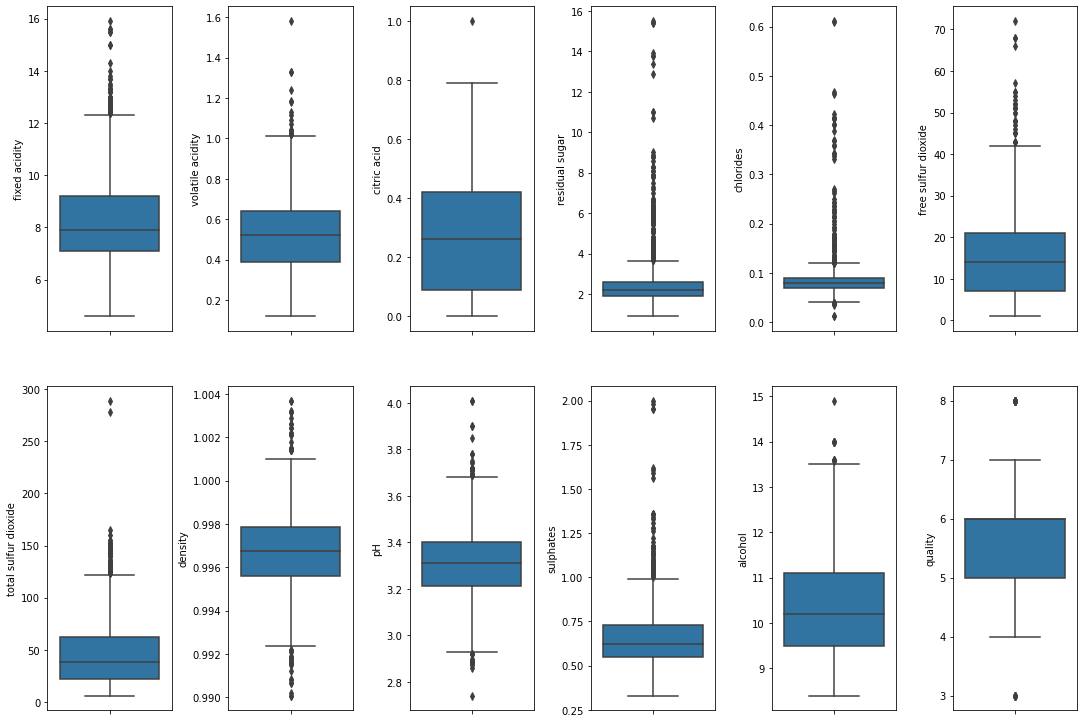

In [10]:

fig, ax=plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index=0
ax=ax.flatten()
for col,value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)
plt.show()

With the help of the above boxplot we are able to see the whisker details and outliers clearly

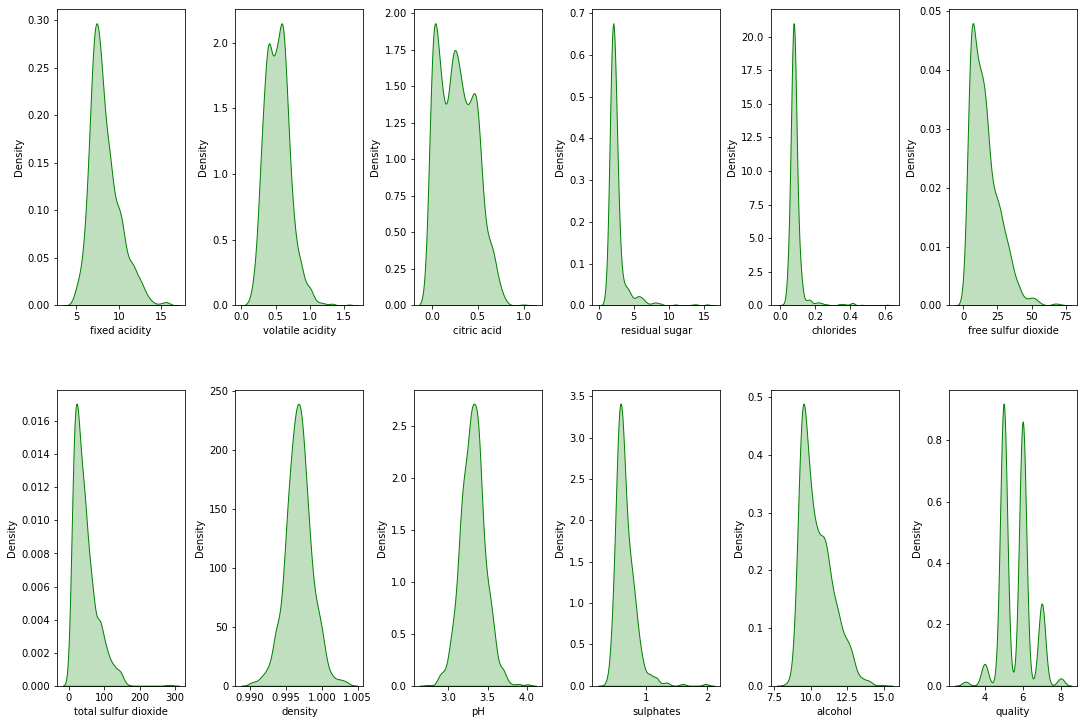

In [11]:
import warnings
warnings.simplefilter("ignore")
fig, ax=plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index=0
ax=ax.flatten()
for col,value in df.items():
    sns.distplot(value,ax=ax[index],hist=False,color="g",kde_kws={"shade":True})
    index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)
plt.show()

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns.

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

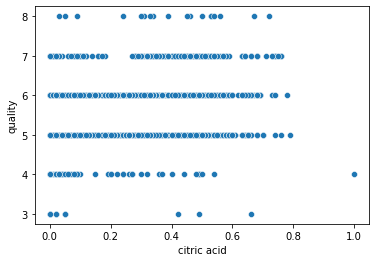

In [12]:
sns.scatterplot(x="citric acid",y="quality",data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

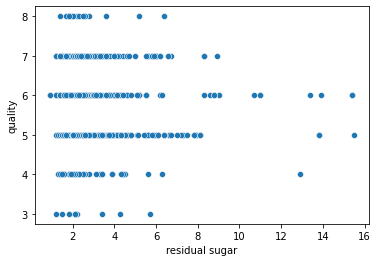

In [13]:
sns.scatterplot(x="residual sugar",y="quality",data=df)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

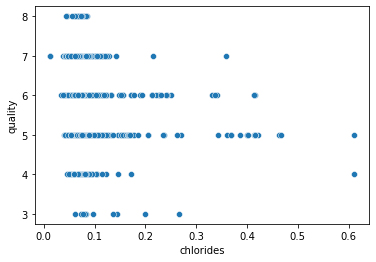

In [14]:
sns.scatterplot(x="chlorides",y="quality",data=df)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

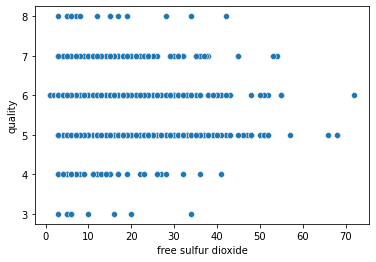

In [15]:
sns.scatterplot(x="free sulfur dioxide",y="quality",data=df)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

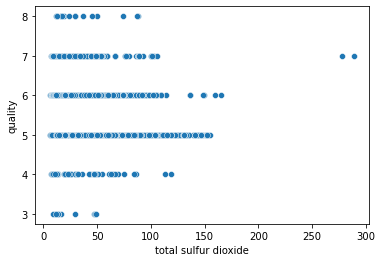

In [16]:
sns.scatterplot(x="total sulfur dioxide",y="quality",data=df)

<AxesSubplot:xlabel='density', ylabel='quality'>

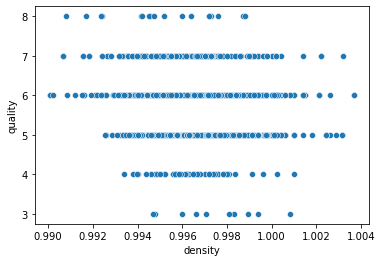

In [17]:
sns.scatterplot(x="density",y="quality",data=df)

<AxesSubplot:xlabel='pH', ylabel='quality'>

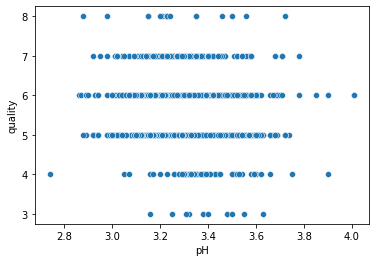

In [18]:
sns.scatterplot(x="pH",y="quality",data=df)

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

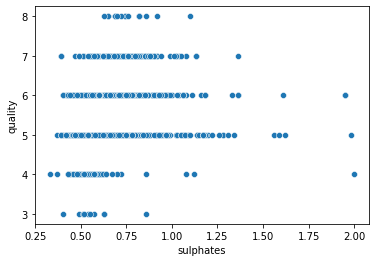

In [19]:
sns.scatterplot(x="sulphates",y="quality",data=df)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

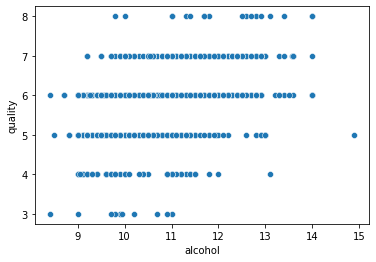

In [20]:
sns.scatterplot(x="alcohol",y="quality",data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

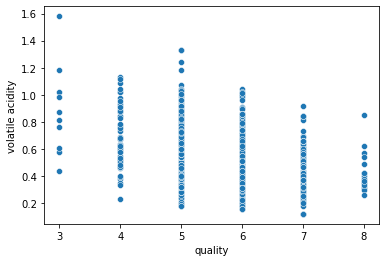

In [21]:
sns.scatterplot(x="quality",y="volatile acidity",data=df)

In [22]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Heatmap

<AxesSubplot:>

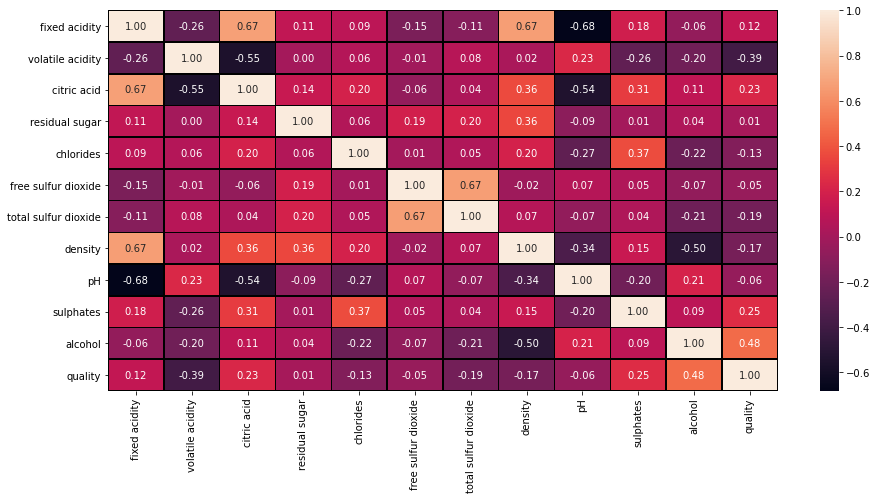

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

In [42]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As per my observation:

    There is a big gap between 75% and max values of residual sugar column
    There is a big gap between 75% and max values of free sulfur dioxide column
    There is a huge gap between 75% and max value of total sulfur dioxide column


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [44]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

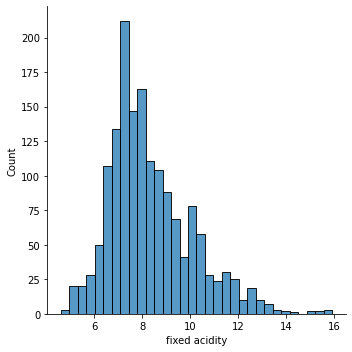

In [45]:
sns.displot(df["fixed acidity"])

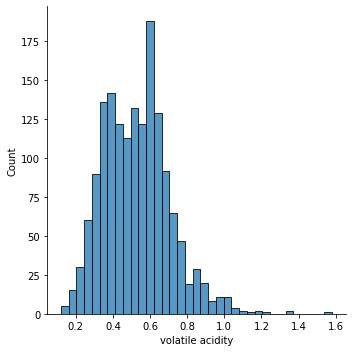

In [46]:
sns.displot(df["volatile acidity"])

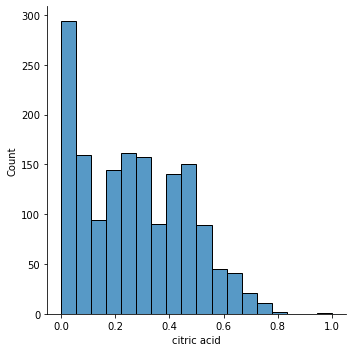

In [47]:
sns.displot(df["citric acid"])

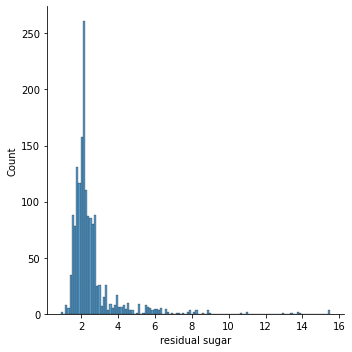

In [48]:
sns.displot(df["residual sugar"])

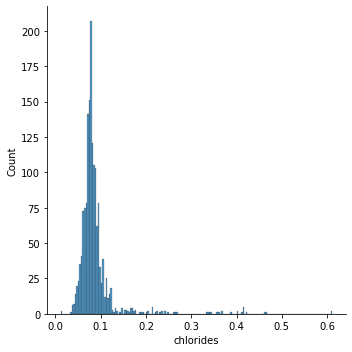

In [49]:
sns.displot(df["chlorides"])

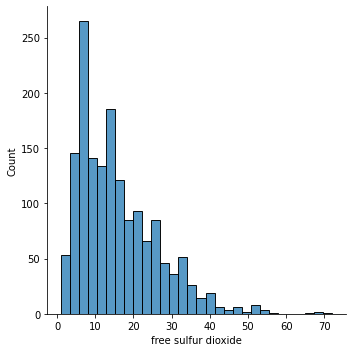

In [50]:
sns.displot(df["free sulfur dioxide"])

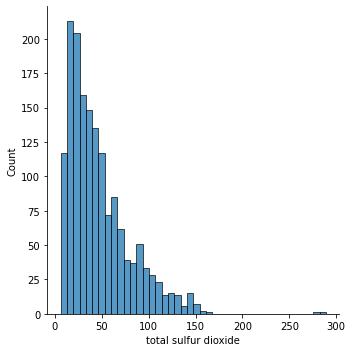

In [51]:
sns.displot(df["total sulfur dioxide"])

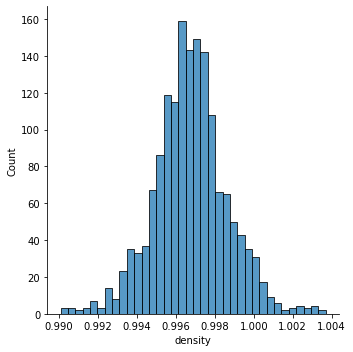

In [52]:
sns.displot(df["density"])

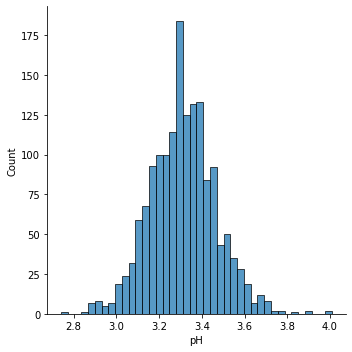

In [53]:
sns.displot(df["pH"])

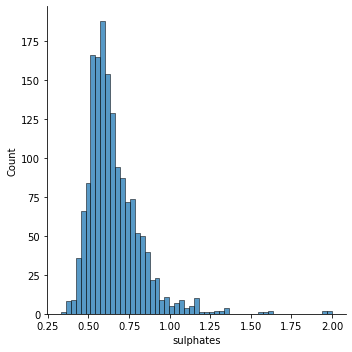

In [54]:
sns.displot(df["sulphates"])

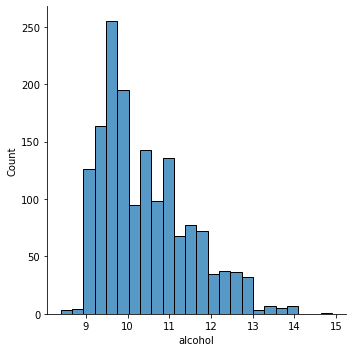

In [55]:
sns.displot(df["alcohol"])

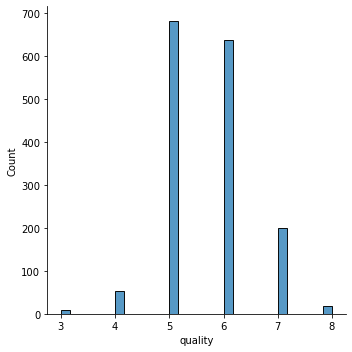

In [56]:
sns.displot(df["quality"])

# Dropping Column

In [57]:
df=df.drop('free sulfur dioxide',axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


# Outlier removal

In [58]:
df.shape

(1599, 11)

In [59]:
import scipy.stats as stats
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [60]:
df.shape

(1464, 11)

In [61]:
data_loss=(1599-1451)/1599*100
data_loss

9.255784865540964

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [62]:
X=df.drop('quality',axis=1)
Y=df['quality']

In [63]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE
oversample= SMOTE()
X,Y=oversample.fit_resample(X,Y)

In [65]:
Y.value_counts()

4    624
6    624
8    624
5    624
7    624
Name: quality, dtype: int64

In [66]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

In [67]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,11.690804,0.318742,0.646565,2.130062,0.072350,28.125773,0.997911,2.942944,0.799019,10.079753
3116,7.224111,0.385511,0.311033,2.017222,0.056689,28.586673,0.994638,3.228967,0.758622,11.361999
3117,7.809067,0.507264,0.332725,2.372694,0.075636,18.273059,0.992685,3.207275,0.716363,12.790829
3118,9.339047,0.395365,0.439270,2.081542,0.068704,13.407709,0.995878,3.279615,0.675923,11.453651


# Label Binarization

In [68]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)

In [69]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [70]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,11.690804,0.318742,0.646565,2.130062,0.072350,28.125773,0.997911,2.942944,0.799019,10.079753
3116,7.224111,0.385511,0.311033,2.017222,0.056689,28.586673,0.994638,3.228967,0.758622,11.361999
3117,7.809067,0.507264,0.332725,2.372694,0.075636,18.273059,0.992685,3.207275,0.716363,12.790829
3118,9.339047,0.395365,0.439270,2.081542,0.068704,13.407709,0.995878,3.279615,0.675923,11.453651


# Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.674271,1.061166,-1.524305,-0.631863,-0.155283,-0.120505,0.809126,1.471077,-0.816774,-1.251575
1,-0.424865,2.084871,-1.524305,0.126980,1.061280,1.126950,0.208143,-0.745898,0.091586,-0.891251
2,-0.424865,1.402401,-1.318943,-0.198238,0.729490,0.635528,0.328340,-0.316806,-0.135504,-0.891251
3,1.695091,-1.327477,1.350760,-0.631863,-0.210582,0.862338,0.929322,-1.031960,-0.665381,-0.891251
4,-0.674271,1.061166,-1.524305,-0.631863,-0.155283,-0.120505,0.809126,1.471077,-0.816774,-1.251575
...,...,...,...,...,...,...,...,...,...,...
3115,2.001116,-1.107140,1.795188,-0.382461,-0.357139,-0.342561,0.876103,-2.584240,0.992517,-0.639246
3116,-0.783941,-0.727410,0.072554,-0.504787,-1.223156,-0.325138,-1.090959,-0.538742,0.686730,0.515815
3117,-0.419211,-0.034970,0.183922,-0.119433,-0.175397,-0.715009,-2.265119,-0.693874,0.366840,1.802920
3118,0.534757,-0.671367,0.730926,-0.435060,-0.558748,-0.898928,-0.346003,-0.176532,0.060724,0.598376


# Creating the training and testing data sets

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# Machine Learning Model for Classification and Evaluation Metrics

In [73]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 




In [74]:
#Classification of model function 
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)
#Training the model
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    acc_score=(accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    class_report=classification_report(Y_test,pred)
    print("\nClassification Report:\n",class_report)
    cv_score=(cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    result=acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

In [75]:
#Logistic Regression
model=LogisticRegression()
classify(model,X,Y)

Accuracy Score: 90.7051282051282

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       391
           1       0.87      0.88      0.88       233

    accuracy                           0.91       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 87.66025641025641

Accuracy Score - Cross Validation Score is 3.0448717948717956


In [76]:
#support Vector Classifier
model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)

Accuracy Score: 91.98717948717949

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       391
           1       0.89      0.90      0.89       233

    accuracy                           0.92       624
   macro avg       0.91      0.92      0.91       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 90.06410256410255

Accuracy Score - Cross Validation Score is 1.923076923076934


In [77]:
#Decision Tree Classifier
model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)

Accuracy Score: 90.7051282051282

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       391
           1       0.86      0.89      0.88       233

    accuracy                           0.91       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 88.62179487179486

Accuracy Score - Cross Validation Score is 2.083333333333343


In [78]:
#Random Forest Classifier
model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)

Accuracy Score: 95.03205128205127

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       391
           1       0.92      0.95      0.93       233

    accuracy                           0.95       624
   macro avg       0.94      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 92.3076923076923

Accuracy Score - Cross Validation Score is 2.724358974358964


In [79]:
#KNeighbors Classifier
model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)

Accuracy Score: 91.66666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       391
           1       0.85      0.94      0.89       233

    accuracy                           0.92       624
   macro avg       0.91      0.92      0.91       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 87.98076923076923

Accuracy Score - Cross Validation Score is 3.685897435897431


In [80]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 96.9551282051282

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       391
           1       0.94      0.98      0.96       233

    accuracy                           0.97       624
   macro avg       0.96      0.97      0.97       624
weighted avg       0.97      0.97      0.97       624

Cross Validation Score: 93.49358974358975

Accuracy Score - Cross Validation Score is 3.461538461538453


# AUC ROC Curve

In [81]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 91.98717948717949


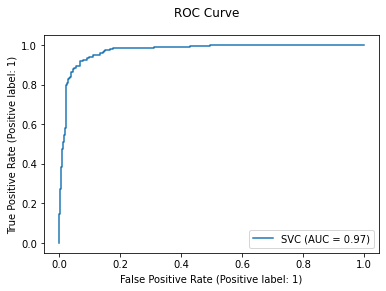

In [82]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 97%